<a href="https://colab.research.google.com/github/WanderingVector/USCensus2020/blob/main/Copy_of_BigQuery_bquxjob_20145a1b_18bc0045fda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'sabrenaproject' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=sabrenaproject:US:bquxjob_20145a1b_18bc0045fda)
back to BigQuery to edit the query within the BigQuery user interface.

In [ ]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_20145a1b_18bc0045fda') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT * FROM `bigquery-public-data.census_bureau_acs.cbsa_2020_5yr`
 LIMIT 10000


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [ ]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_20145a1b_18bc0045fda') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

geo_id  aggregate_travel_time_to_work  amerindian_including_hispanic  \
0    10740                      9333495.0                        52677.0   
1    11260                      4047440.0                        28415.0   
2    14020                      1592795.0                          467.0   
3    14500                      3397390.0                         1656.0   
4    15500                      1806220.0                          688.0   
..     ...                            ...                            ...   
934  32340                       160920.0                           47.0   
935  16260                       359840.0                          996.0   
936  29020                       654400.0                          443.0   
937  16660                       503560.0                           75.0   
938  29100                      1286530.0                          291.0   

     amerindian_pop  armed_forces  asian_including_hispanic  asian_male_45_54  \
0           46796.0        3703.0                   21507.0            1369.0   
1           26420.0        9618.0                   30246.0            1661.0   
2             399.0         104.0                    9751.0             289.0   
3            1136.0         164.0                   15832.0             892.0   
4             425.0         172.0                    2679.0             234.0   
..              ...           ...                       ...               ...   
934            46.0           7.0                     324.0              11.0   
935           972.0          27.0                     502.0               0.0   
936           302.0          27.0                    1113.0              54.0   
937            54.0           0.0                     620.0              17.0   
938           280.0         126.0                    5200.0             245.0   

     asian_male_55_64  asian_pop  associates_degree  ...  \
0               844.0    19876.0            56325.0  ...   
1              1311.0    29037.0            24163.0  ...   
2               210.0     9736.0             7861.0  ...   
3               602.0    15686.0            13861.0  ...   
4               186.0     2613.0            12234.0  ...   
..                ...        ...                ...  ...   
934              61.0      324.0              880.0  ...   
935              83.0      463.0             3206.0  ...   
936              83.0     1113.0             5174.0  ...   
937              83.0      553.0             4689.0  ...   
938              83.0     5174.0            11974.0  ...   

     vacant_housing_units  vacant_housing_units_for_rent  \
0                 34556.0                         9247.0   
1                 21377.0                         4116.0   
2                  7078.0                         1553.0   
3                  8044.0                         2094.0   
4                  6263.0                         1245.0   
..                    ...                            ...   
934                1270.0                          180.0   
935                4361.0                          740.0   
936                5030.0                          979.0   
937                3159.0                          739.0   
938                3051.0                          682.0   

     vacant_housing_units_for_sale  walked_to_work  white_including_hispanic  \
0                           3658.0          6786.0                  647918.0   
1                           1741.0          4808.0                  266588.0   
2                            525.0          4934.0                  146129.0   
3                            592.0          7925.0                  283102.0   
4                            350.0           760.0                  114429.0   
..                             ...             ...                       ...   
934                          112.0           466.0                   20724.0   
935                           96.0  

## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [ ]:
results.describe()

aggregate_travel_time_to_work  amerindian_including_hispanic  \
count                   9.340000e+02                     939.000000   
mean                    3.955052e+06                    2349.651757   
std                     1.597738e+07                    7906.275370   
min                     7.066000e+04                       0.000000   
25%                     3.558775e+05                     125.000000   
50%                     6.888900e+05                     381.000000   
75%                     1.819356e+06                    1392.000000   
max                     3.172920e+08                  106287.000000   

       amerindian_pop  armed_forces  asian_including_hispanic  \
count      939.000000    939.000000              9.390000e+02   
mean      1720.397231   1204.313099              1.950737e+04   
std       6020.656963   5306.048619              1.242094e+05   
min          0.000000      0.000000              0.000000e+00   
25%         91.500000     11.000000              2.790000e+02   
50%        297.000000     49.000000              7.710000e+02   
75%       1033.000000    281.500000              3.590500e+03   
max      86770.000000  85427.000000              2.206530e+06   

       asian_male_45_54  asian_male_55_64     asian_pop  associates_degree  \
count        939.000000        939.000000  9.390000e+02         939.000000   
mean        1252.877529        987.521832  1.925334e+04       19506.948882   
std         8246.298376       7055.818044  1.228586e+05       56827.645499   
min            0.000000          0.000000  0.000000e+00         337.000000   
25%            7.000000          3.000000  2.755000e+02        2493.000000   
50%           48.000000         33.000000  7.500000e+02        4993.000000   
75%          206.000000        158.000000  3.537000e+03       12420.000000   
max       147407.000000     130118.000000  2.186532e+06      914440.000000   

       bachelors_degree  ...  vacant_housing_units  \
count      9.390000e+02  ...            939.000000   
mean       4.678081e+04  ...          14902.613419   
std        1.774476e+05  ...          38283.958940   
min        5.280000e+02  ...            500.000000   
25%        3.528000e+03  ...           2620.500000   
50%        7.447000e+03  ...           5201.000000   
75%        2.226300e+04  ...          11220.000000   
max        3.221073e+06  ...         690776.000000   

       vacant_housing_units_for_rent  vacant_housing_units_for_sale  \
count                     939.000000                     939.000000   
mean                     2761.410011                    1121.760383   
std                      8543.339123                    3169.290959   
min                         4.000000                       0.000000   
25%                       283.500000                     164.500000   
50%                       629.000000                     336.000000   
75%                      1674.000000                     759.000000   
max                    126756.000000                   53087.000000   

       walked_to_work  white_including_hispanic  white_male_45_54  \
count      939.000000              9.390000e+02        939.000000   
mean      3997.982961              2.307440e+05      12766.568690   
std      20464.506846              6.560528e+05      35897.307831   
min          0.000000              4.711000e+03          0.000000   
25%        347.000000              3.307200e+04       1823.000000   
50%        806.000000              6.055400e+04       3420.000000   
75%       2163.000000              1.473825e+05       8294.500000   
max     523412.000000              1.072606e+07     588331.000000   

       white_male_55_64     white_pop  worked_at_home  workers_16_and_over  
count        939.000000  9.390000e+02      939.000000         9.390000e+02  
mean       14070.853035  1.936435e+05    11457.849840         1.567585e+05  
std        38638.429276  5.219898e+05    43589.516025         5.323964e+05  
min            0.0000

In [ ]:
print(results.columns)

Index(['geo_id', 'aggregate_travel_time_to_work',
       'amerindian_including_hispanic', 'amerindian_pop', 'armed_forces',
       'asian_including_hispanic', 'asian_male_45_54', 'asian_male_55_64',
       'asian_pop', 'associates_degree',
       ...
       'vacant_housing_units', 'vacant_housing_units_for_rent',
       'vacant_housing_units_for_sale', 'walked_to_work',
       'white_including_hispanic', 'white_male_45_54', 'white_male_55_64',
       'white_pop', 'worked_at_home', 'workers_16_and_over'],
      dtype='object', length=245)


In [ ]:
# Assuming 'job' contains the results of your BigQuery job
df = job.to_dataframe()


In [ ]:

# Get the list of all column names
column_names = df.columns

# Display the list of column names
print("Columns in the DataFrame:")
for column in column_names:
    print(column)


Columns in the DataFrame:
geo_id
amerindian_including_hispanic
amerindian_pop
armed_forces
asian_including_hispanic
asian_male_45_54
asian_male_55_64
asian_pop
associates_degree
bachelors_degree
bachelors_degree_2
bachelors_degree_or_higher_25_64
black_including_hispanic
black_male_45_54
black_male_55_64
black_pop
children
children_in_single_female_hh
civilian_labor_force
commute_10_14_mins
commute_15_19_mins
commute_20_24_mins
commute_25_29_mins
commute_30_34_mins
commute_35_39_mins
commute_35_44_mins
commute_40_44_mins
commute_45_59_mins
commute_5_9_mins
commute_60_89_mins
commute_60_more_mins
commute_90_more_mins
commute_less_10_mins
commuters_16_over
commuters_by_bus
commuters_by_car_truck_van
commuters_by_carpool
commuters_by_public_transportation
commuters_by_subway_or_elevated
commuters_drove_alone
different_house_year_ago_different_city
different_house_year_ago_same_city
dwellings_10_to_19_units
dwellings_1_units_attached
dwellings_1_units_detached
dwellings_20_to_49_units
dwel

## **Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis**

In [ ]:
# List of columns to eliminate
columns_to_eliminate = [
    'aggregate_travel_time_to_work',
    'vacant_housing_units',
    'vacant_housing_units_for_rent',
    'vacant_housing_units_for_sale',
    'walked_to_work',
    'worked_at_home'
]

# Eliminate the specified columns
df = df.drop(columns=columns_to_eliminate)


In [ ]:
print(df.columns)

Index(['geo_id', 'amerindian_including_hispanic', 'amerindian_pop',
       'armed_forces', 'asian_including_hispanic', 'asian_male_45_54',
       'asian_male_55_64', 'asian_pop', 'associates_degree',
       'bachelors_degree',
       ...
       'two_parents_father_in_labor_force_families_with_young_children',
       'two_parents_in_labor_force_families_with_young_children',
       'two_parents_mother_in_labor_force_families_with_young_children',
       'two_parents_not_in_labor_force_families_with_young_children',
       'unemployed_pop', 'white_including_hispanic', 'white_male_45_54',
       'white_male_55_64', 'white_pop', 'workers_16_and_over'],
      dtype='object', length=239)


In [ ]:
# Check for columns with names containing keywords related to years
year_columns = [col for col in df.columns if 'year' in col.lower() or 'date' in col.lower()]

# Print the identified year-related columns
if year_columns:
    print("Year-related columns found:")
    for col in year_columns:
        print(col)
else:
    print("No year-related columns found in the dataset.")


Year-related columns found:
different_house_year_ago_different_city
different_house_year_ago_same_city
less_one_year_college
median_year_structure_built
one_year_more_college
pop_25_years_over
pop_5_years_over
population_1_year_and_over
population_3_years_over


# **Create a correlation matrix heatmap (colored).**
## Discuss what the coefficients in the plot mean in terms of the relationships between the variables

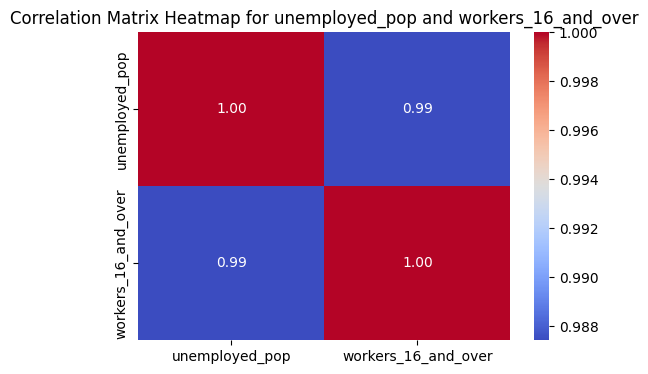

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest
selected_columns = ['unemployed_pop', 'workers_16_and_over']
subset_df = df[selected_columns]

# Create a correlation matrix for the selected columns
correlation_matrix = subset_df.corr()

# Set up the plot
plt.figure(figsize=(6, 4))

# Create a heatmap with a colored scale
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add plot title
plt.title('Correlation Matrix Heatmap for unemployed_pop and workers_16_and_over')

# Display the plot
plt.show()


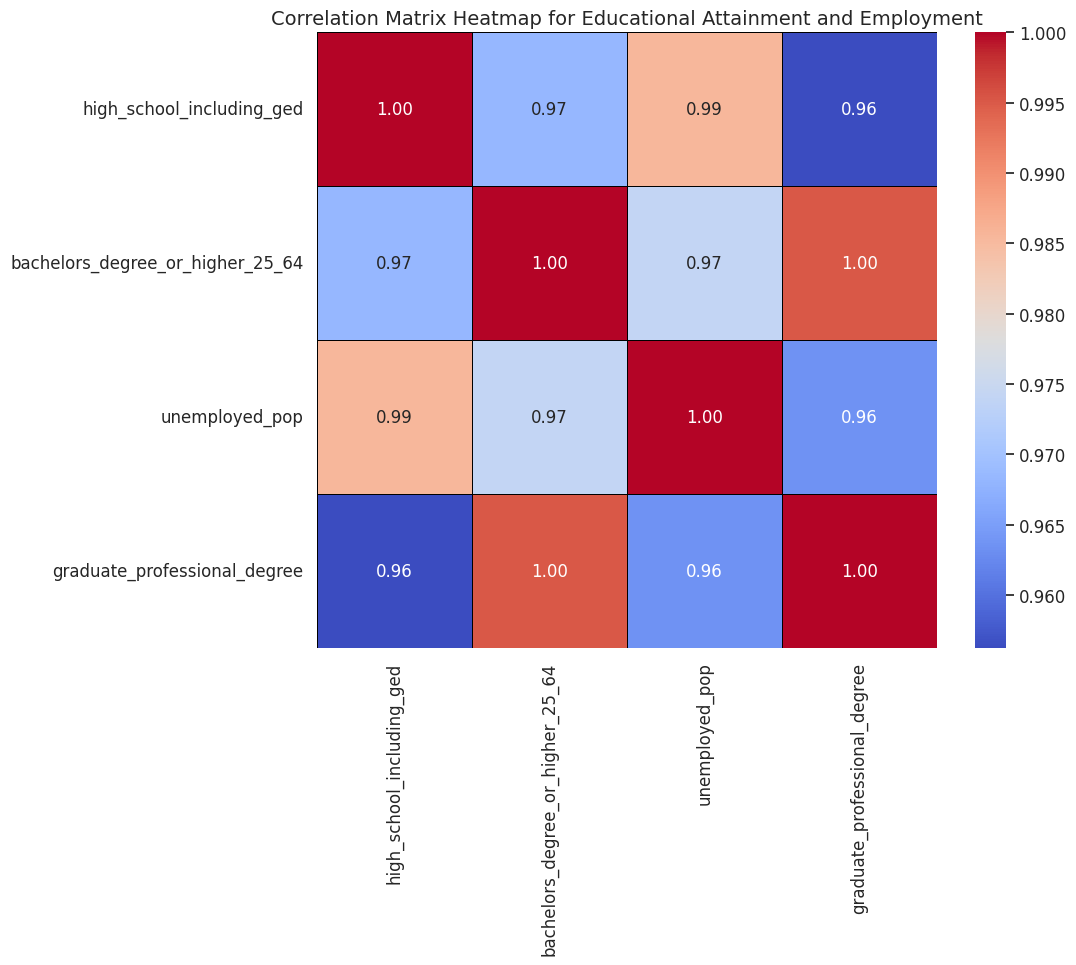

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest
selected_columns = ['high_school_including_ged', 'bachelors_degree_or_higher_25_64', 'unemployed_pop', 'graduate_professional_degree']
subset_df = df[selected_columns]

# Create a correlation matrix for the selected columns
correlation_matrix = subset_df.corr()

# Set up a modern-looking style
sns.set(style='white')
plt.figure(figsize=(10, 8))

# Create a heatmap with a colored scale
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='black')

# Customize plot aesthetics
plt.title('Correlation Matrix Heatmap for Educational Attainment and Employment', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a colorbar
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

# Display the plot
plt.show()


# •	0.5–1.0: strong **relationship**

*   In my specific heatmap, with values close to 1 in the center, it suggests a strong positive relationship between educational attainment and employment status.

* This indicates that individuals with higher levels of education tend to have
higher employment rates.
* Understanding these correlations is essential for me to make informed decisions or draw insights from my data related to education and employment.
  



## **Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.**

Discuss the output in a markdown cell

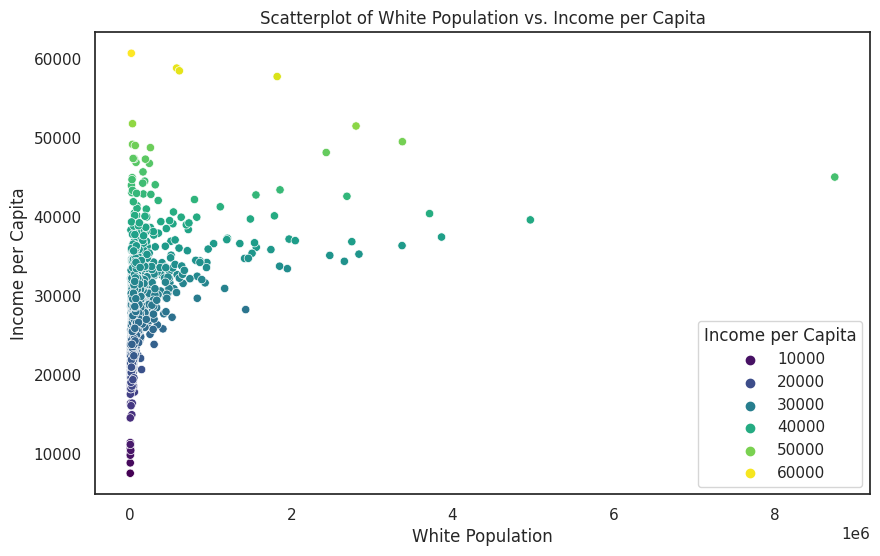

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot for 'white_pop' vs. 'income_per_capita'
plt.figure(figsize=(10, 6))

# Create the scatterplot
sns.scatterplot(data=df, x='white_pop', y='income_per_capita', hue='income_per_capita', palette='viridis')

# Customize plot aesthetics
plt.title('Scatterplot of White Population vs. Income per Capita')
plt.xlabel('White Population')
plt.ylabel('Income per Capita')
plt.legend(title='Income per Capita')

# Display the plot
plt.show()


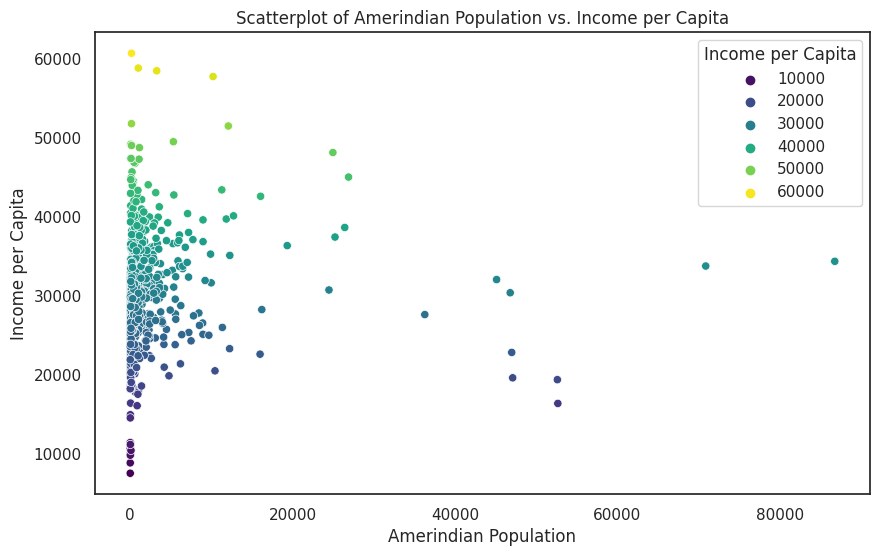

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot for 'amerindian_pop' vs. 'income_per_capita'
plt.figure(figsize=(10, 6))

# Create the scatterplot
sns.scatterplot(data=df, x='amerindian_pop', y='income_per_capita', hue='income_per_capita', palette='viridis')

# Customize plot aesthetics
plt.title('Scatterplot of Amerindian Population vs. Income per Capita')
plt.xlabel('Amerindian Population')
plt.ylabel('Income per Capita')
plt.legend(title='Income per Capita')

# Display the plot
plt.show()


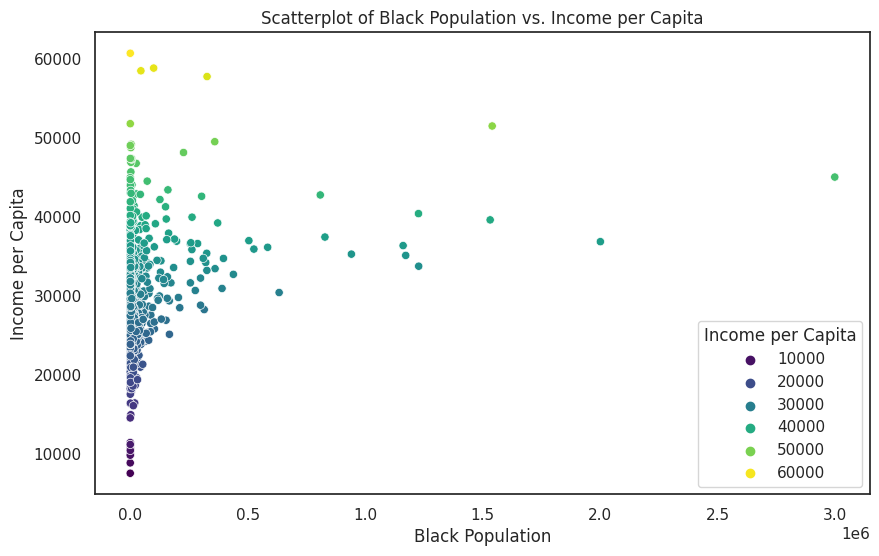

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot for 'black_pop' vs. 'income_per_capita'
plt.figure(figsize=(10, 6))

# Create the scatterplot
sns.scatterplot(data=df, x='black_pop', y='income_per_capita', hue='income_per_capita', palette='viridis')

# Customize plot aesthetics
plt.title('Scatterplot of Black Population vs. Income per Capita')
plt.xlabel('Black Population')
plt.ylabel('Income per Capita')
plt.legend(title='Income per Capita')

# Display the plot
plt.show()


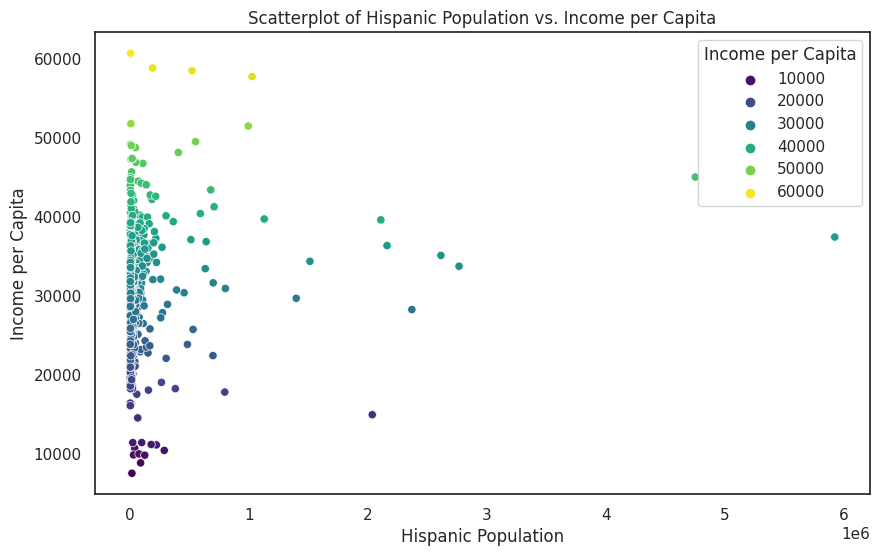

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot for 'hispanic_pop' vs. 'income_per_capita'
plt.figure(figsize=(10, 6))

# Create the scatterplot
sns.scatterplot(data=df, x='hispanic_pop', y='income_per_capita', hue='income_per_capita', palette='viridis')

# Customize plot aesthetics
plt.title('Scatterplot of Hispanic Population vs. Income per Capita')
plt.xlabel('Hispanic Population')
plt.ylabel('Income per Capita')
plt.legend(title='Income per Capita')

# Display the plot
plt.show()


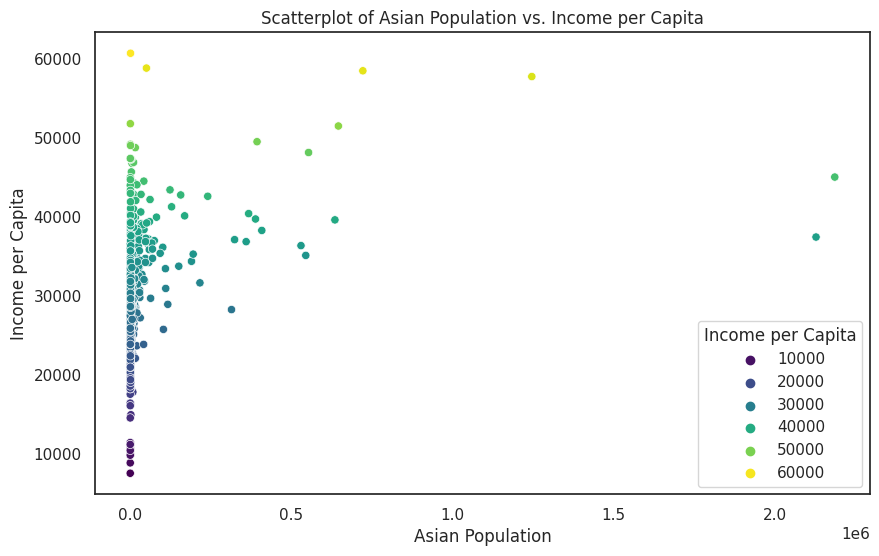

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot for 'asian_pop' vs. 'income_per_capita'
plt.figure(figsize=(10, 6))

# Create the scatterplot
sns.scatterplot(data=df, x='asian_pop', y='income_per_capita', hue='income_per_capita', palette='viridis')

# Customize plot aesthetics
plt.title('Scatterplot of Asian Population vs. Income per Capita')
plt.xlabel('Asian Population')
plt.ylabel('Income per Capita')
plt.legend(title='Income per Capita')

# Display the plot
plt.show()


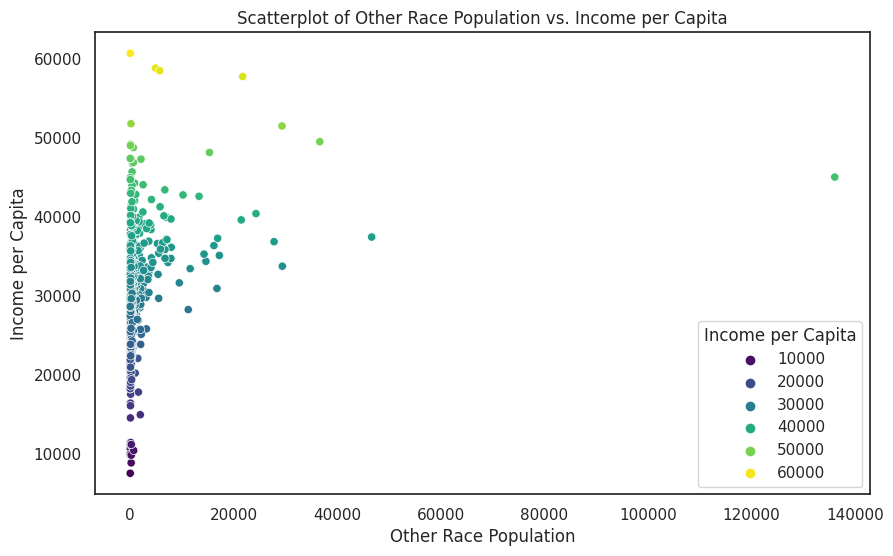

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot for 'other_race_pop' vs. 'income_per_capita'
plt.figure(figsize=(10, 6))

# Create the scatterplot
sns.scatterplot(data=df, x='other_race_pop', y='income_per_capita', hue='income_per_capita', palette='viridis')

# Customize plot aesthetics
plt.title('Scatterplot of Other Race Population vs. Income per Capita')
plt.xlabel('Other Race Population')
plt.ylabel('Income per Capita')
plt.legend(title='Income per Capita')

# Display the plot
plt.show()


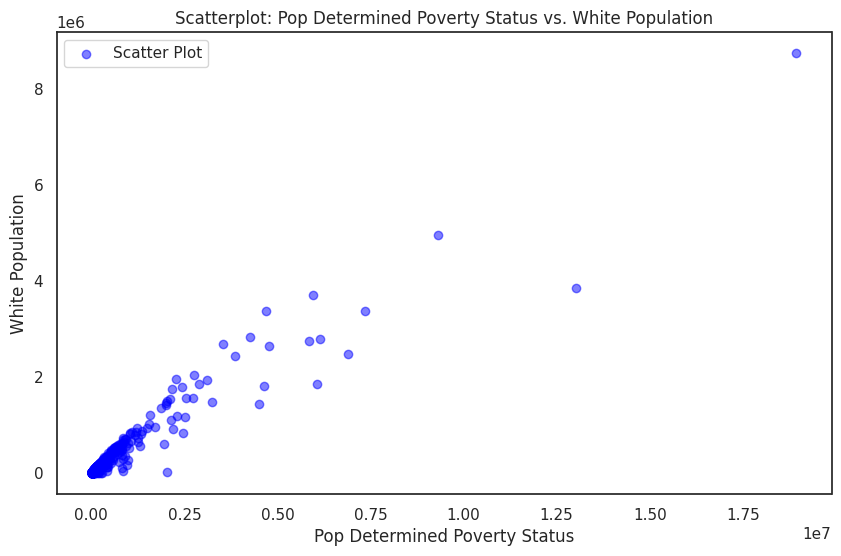

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a scatterplot for 'pop_determined_poverty_status' vs. 'white_pop'
plt.figure(figsize=(10, 6))

# Create the scatterplot
plt.scatter(df['pop_determined_poverty_status'], df['white_pop'], alpha=0.5, c='blue', label='Scatter Plot')

# Customize plot aesthetics
plt.title('Scatterplot: Pop Determined Poverty Status vs. White Population')
plt.xlabel('Pop Determined Poverty Status')
plt.ylabel('White Population')
plt.legend()

# Display the plot
plt.show()


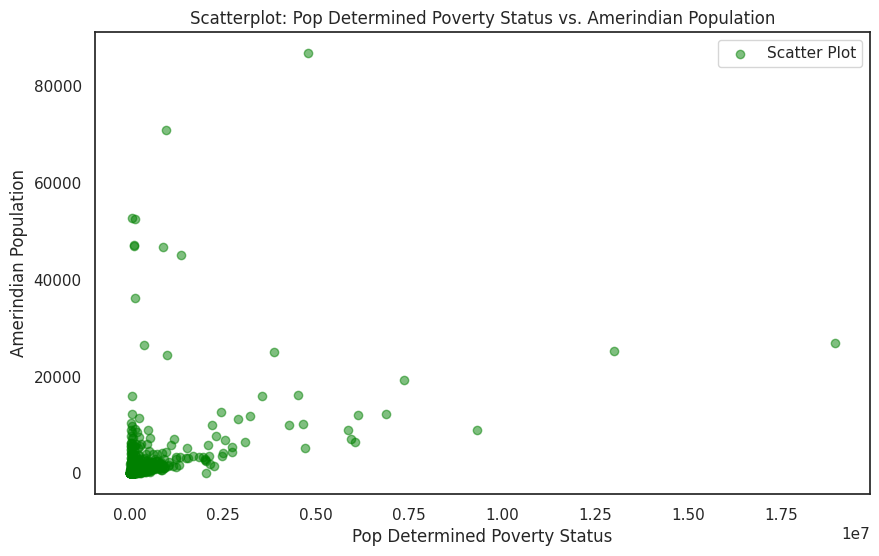

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a scatterplot for 'pop_determined_poverty_status' vs. 'amerindian_pop'
plt.figure(figsize=(10, 6))

# Create the scatterplot
plt.scatter(df['pop_determined_poverty_status'], df['amerindian_pop'], alpha=0.5, c='green', label='Scatter Plot')

# Customize plot aesthetics
plt.title('Scatterplot: Pop Determined Poverty Status vs. Amerindian Population')
plt.xlabel('Pop Determined Poverty Status')
plt.ylabel('Amerindian Population')
plt.legend()

# Display the plot
plt.show()


## This scatterplot shows that the relationship between the two variables “Amerindian Population" and “Population determined poverty status” isn’t purely linear (i.e., it doesn’t only trend in a single direction).

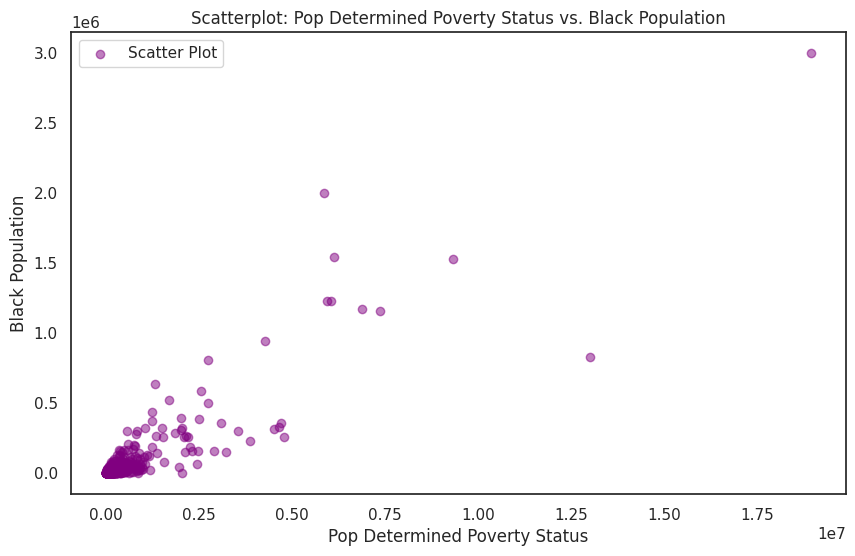

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a scatterplot for 'pop_determined_poverty_status' vs. 'black_pop'
plt.figure(figsize=(10, 6))

# Create the scatterplot
plt.scatter(df['pop_determined_poverty_status'], df['black_pop'], alpha=0.5, c='purple', label='Scatter Plot')

# Customize plot aesthetics
plt.title('Scatterplot: Pop Determined Poverty Status vs. Black Population')
plt.xlabel('Pop Determined Poverty Status')
plt.ylabel('Black Population')
plt.legend()

# Display the plot
plt.show()


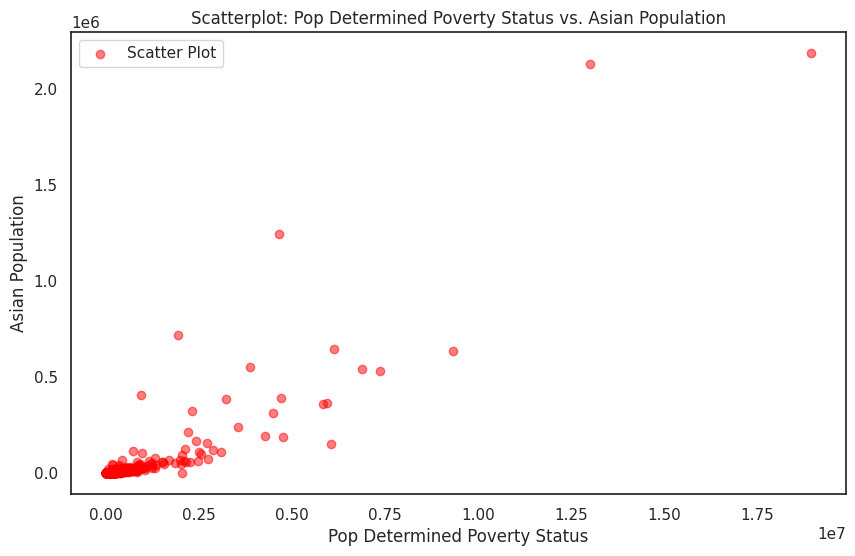

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a scatterplot for 'pop_determined_poverty_status' vs. 'asian_pop'
plt.figure(figsize=(10, 6))

# Create the scatterplot
plt.scatter(df['pop_determined_poverty_status'], df['asian_pop'], alpha=0.5, c='red', label='Scatter Plot')

# Customize plot aesthetics
plt.title('Scatterplot: Pop Determined Poverty Status vs. Asian Population')
plt.xlabel('Pop Determined Poverty Status')
plt.ylabel('Asian Population')
plt.legend()

# Display the plot
plt.show()


## This scatterplot shows that the relationship between the two variables “Asian Population" and “Population determined poverty status” isn’t purely linear (i.e., it doesn’t only trend in a single direction).

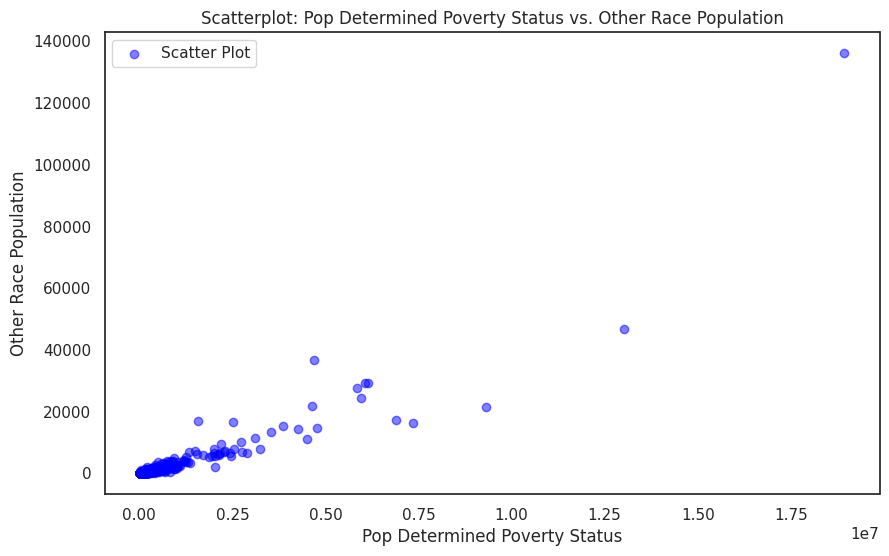

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a scatterplot for 'pop_determined_poverty_status' vs. 'other_race_pop'
plt.figure(figsize=(10, 6))

# Create the scatterplot
plt.scatter(df['pop_determined_poverty_status'], df['other_race_pop'], alpha=0.5, c='blue', label='Scatter Plot')

# Customize plot aesthetics
plt.title('Scatterplot: Pop Determined Poverty Status vs. Other Race Population')
plt.xlabel('Pop Determined Poverty Status')
plt.ylabel('Other Race Population')
plt.legend()

# Display the plot
plt.show()


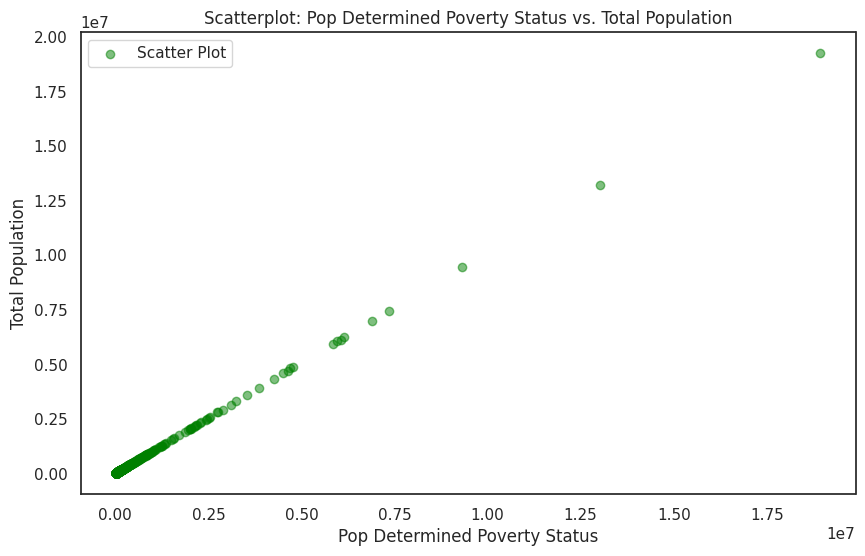

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a scatterplot for 'pop_determined_poverty_status' vs. 'total_pop'
plt.figure(figsize=(10, 6))

# Create the scatterplot
plt.scatter(df['pop_determined_poverty_status'], df['total_pop'], alpha=0.5, c='green', label='Scatter Plot')

# Customize plot aesthetics
plt.title('Scatterplot: Pop Determined Poverty Status vs. Total Population')
plt.xlabel('Pop Determined Poverty Status')
plt.ylabel('Total Population')
plt.legend()

# Display the plot
plt.show()


## This scatterplot shows that the relationship between the two variables “Total Population" and “Population determined poverty status” is purely linear (i.e., it doese only trend in a single direction).

## Create a pair plot of the data set.

---


Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

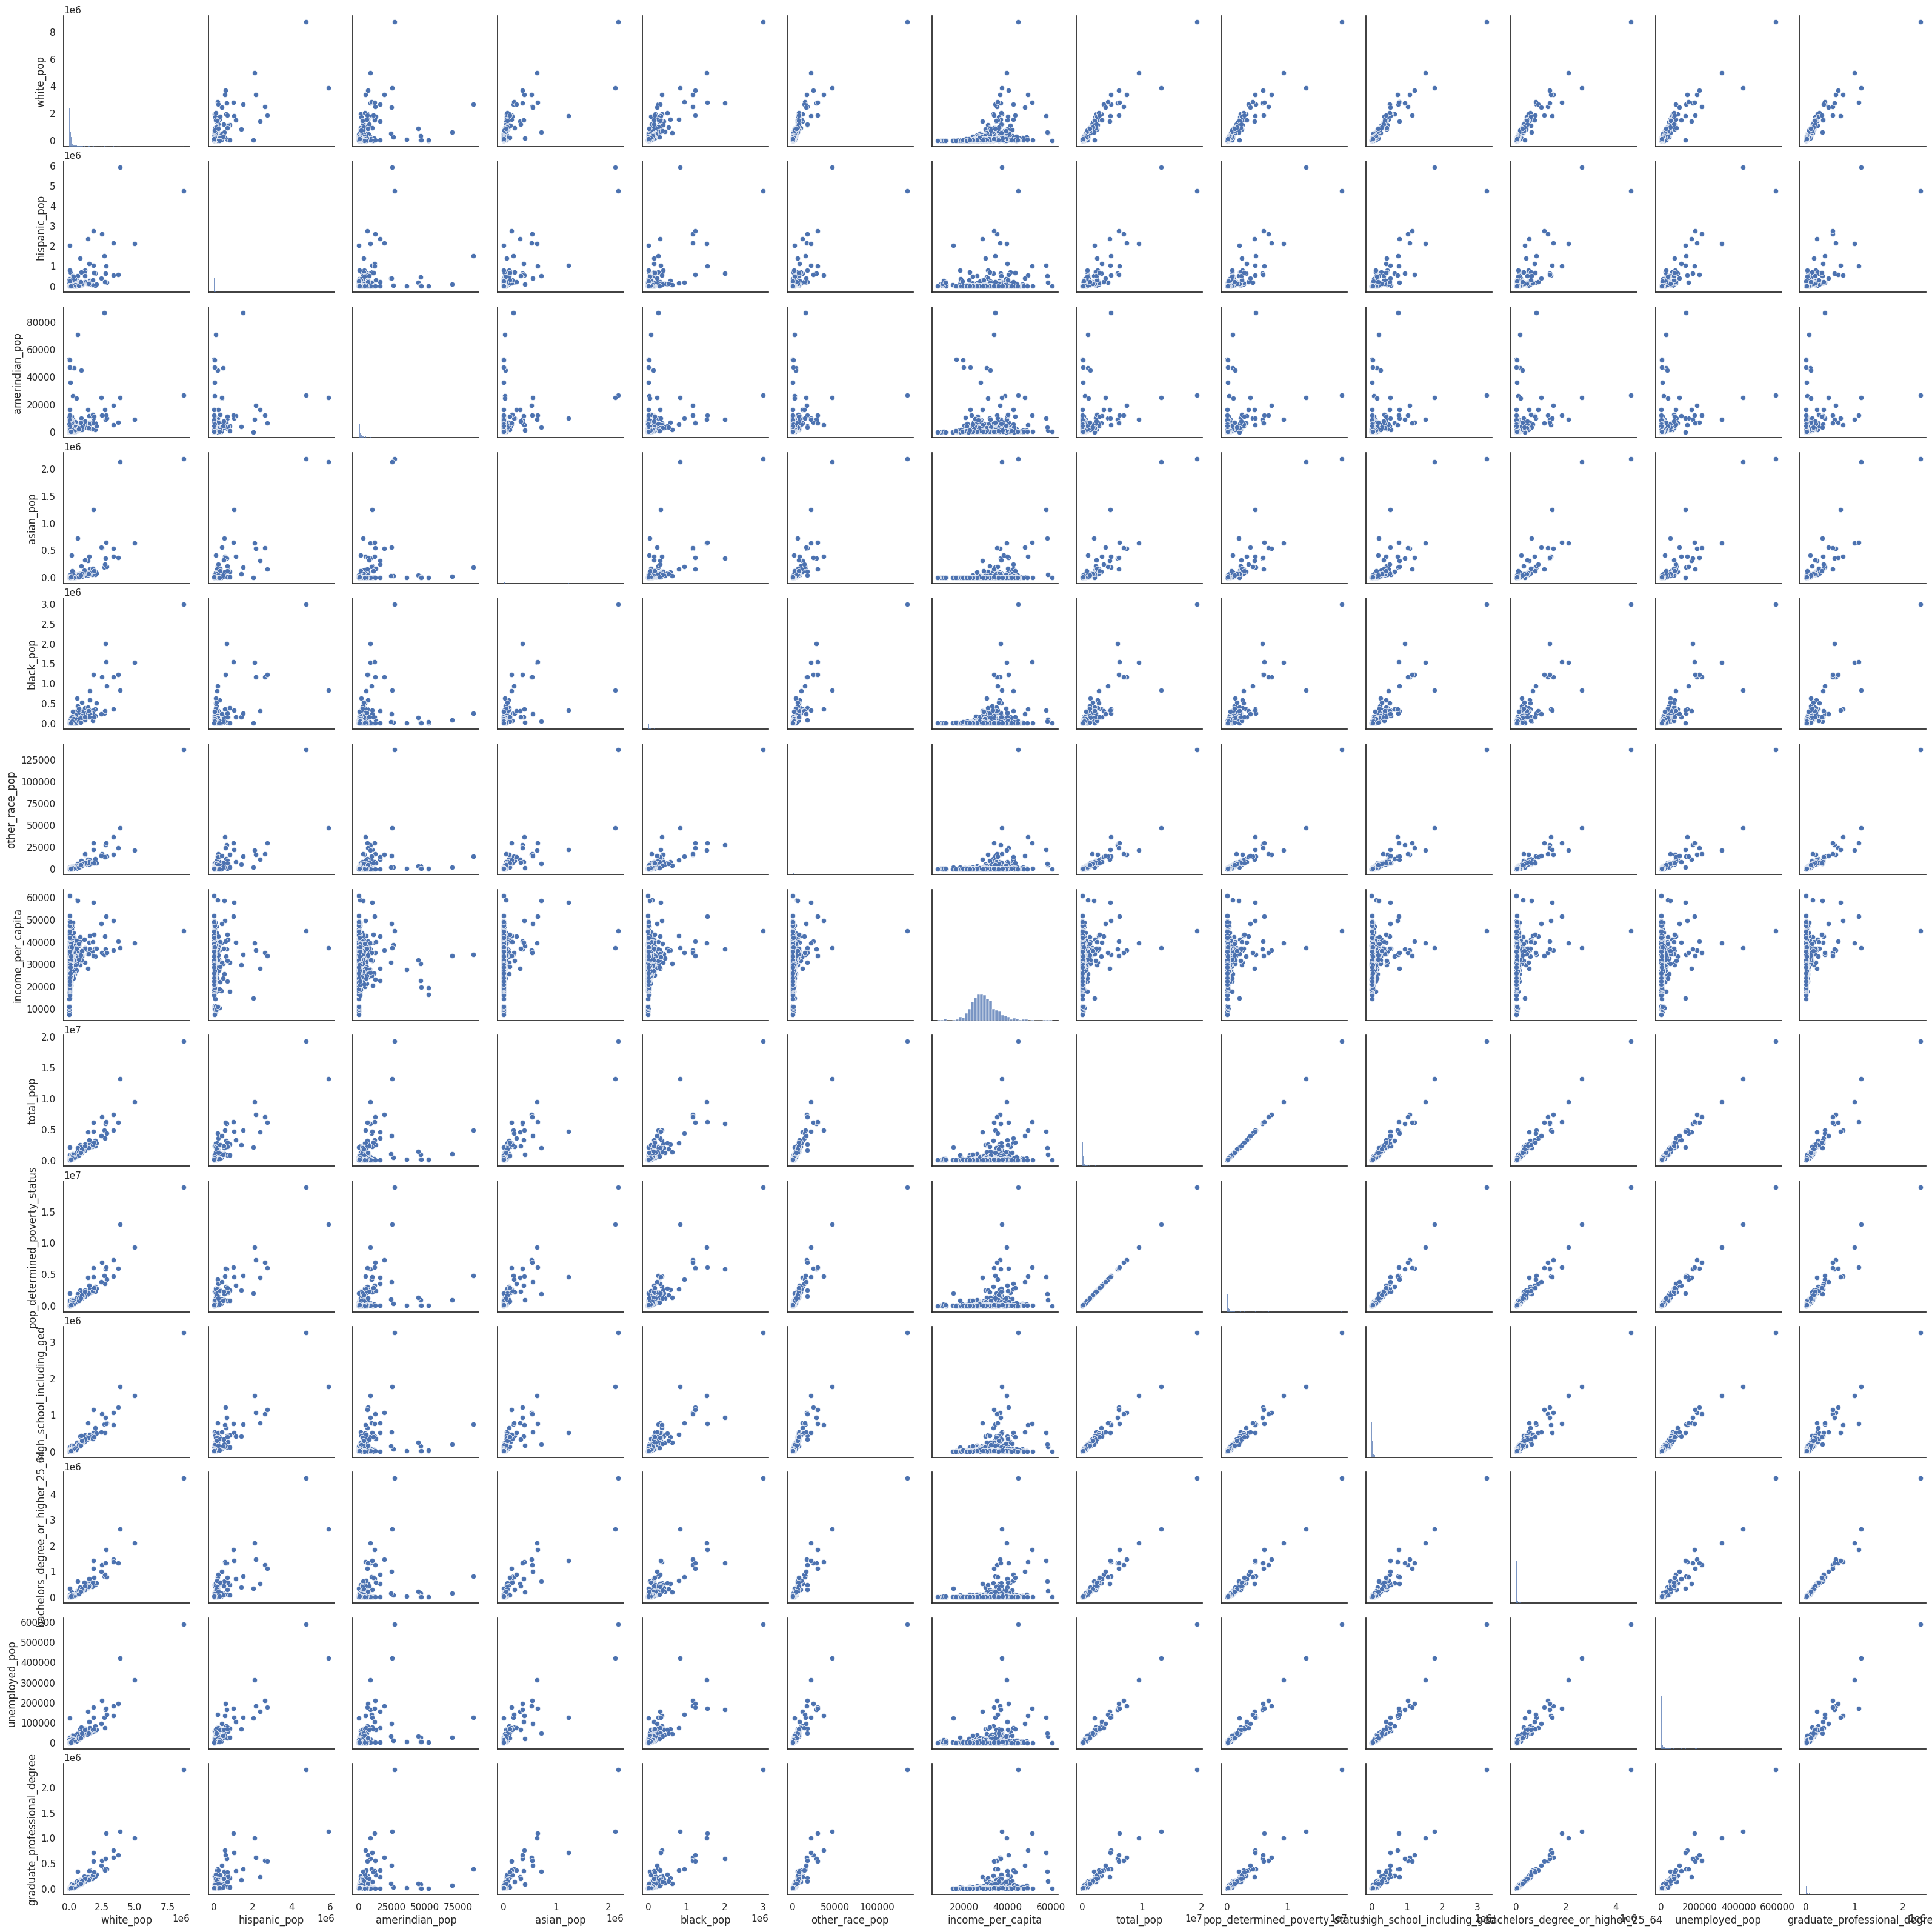

In [ ]:
# Select a subset of variables I want to include in the pair plot
selected_variables = ['white_pop', 'hispanic_pop', 'amerindian_pop', 'asian_pop', 'black_pop', 'other_race_pop', 'income_per_capita', 'total_pop', 'pop_determined_poverty_status', 'high_school_including_ged', 'bachelors_degree_or_higher_25_64', 'unemployed_pop', 'graduate_professional_degree']

# Create a pair plot for the selected variables in the sample
sns.pairplot(df[selected_variables])


In [ ]:

# Get a list of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Display the list of categorical columns
print("Categorical Columns:")
for column in categorical_columns:
    print(column)


Categorical Columns:
geo_id


## Create a categorical plot and interpret the results.

I do not have many categorical plots in this data set. Geo_Id is the only one. This chart does not help nor show me much.

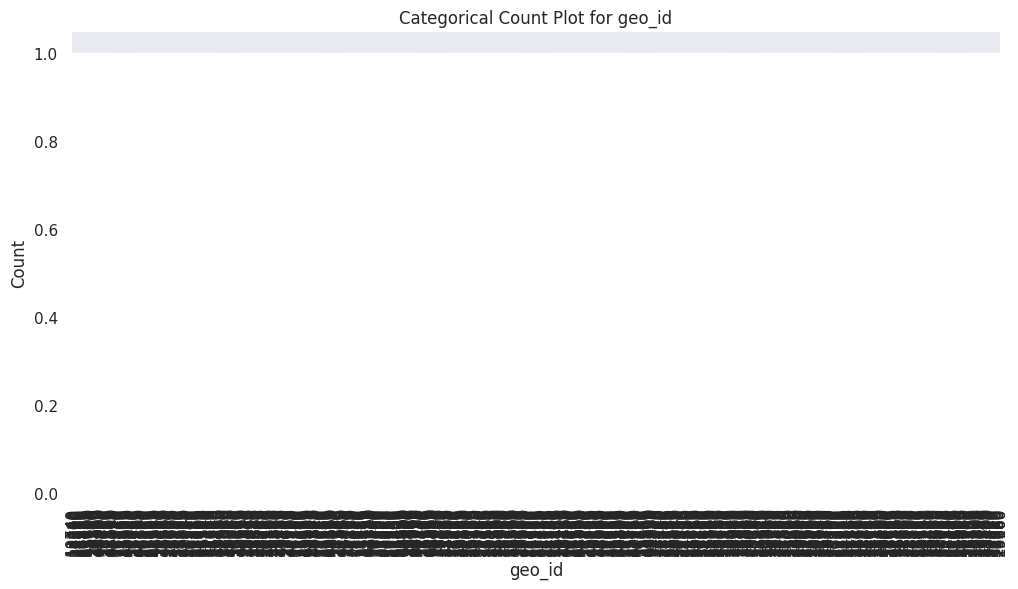

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")

# Create a count plot for the 'geo_id' column
sns.countplot(data=df, x='geo_id', palette='Set1')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

plt.title('Categorical Count Plot for geo_id')
plt.xlabel('geo_id')
plt.ylabel('Count')

# Display the plot
plt.show()


## Analysis Question 4: Can we identify any patterns or clusters in terms of employment by industry or occupation within specific geographic areas?

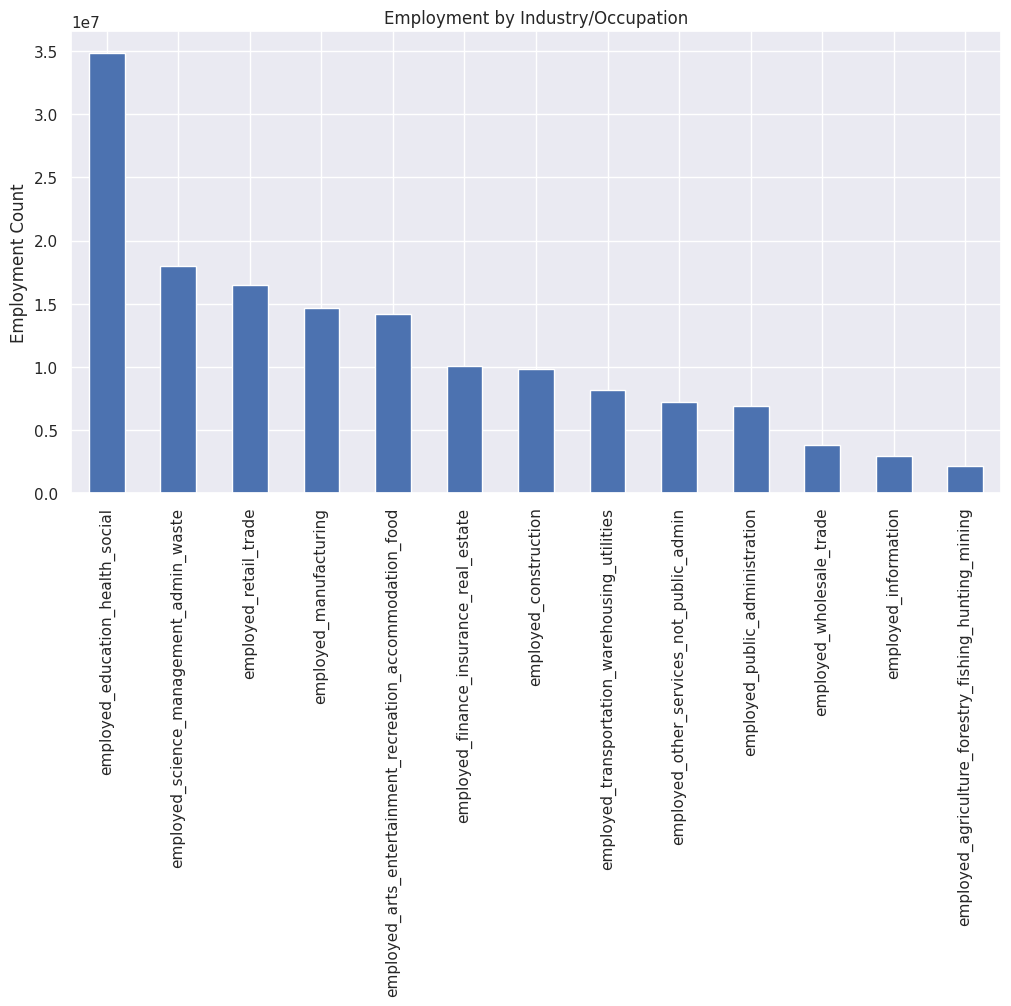

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Columns to use
columns = [
    'employed_agriculture_forestry_fishing_hunting_mining',
    'employed_arts_entertainment_recreation_accommodation_food',
    'employed_construction',
    'employed_education_health_social',
    'employed_finance_insurance_real_estate',
    'employed_information',
    'employed_manufacturing',
    'employed_other_services_not_public_admin',
    'employed_public_administration',
    'employed_retail_trade',
    'employed_science_management_admin_waste',
    'employed_transportation_warehousing_utilities',
    'employed_wholesale_trade'
]

# Create a DataFrame with the specified columns and 'geo_id'
data = df[['geo_id'] + columns]

# Set 'geo_id' as the index
data.set_index('geo_id', inplace=True)

# Create a bar chart
ax = data.sum().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
ax.set_ylabel('Employment Count')
ax.set_title('Employment by Industry/Occupation')

# Adjust layout to add buffer space
plt.margins(0.05)

plt.show()


### **Hypothesis for Question 4:** We might find variations in the distribution of employment across different industries and occupations within specific geographic areas. For instance, some regions may be more focused on manufacturing or retail trade, while others might emphasize education and health services.

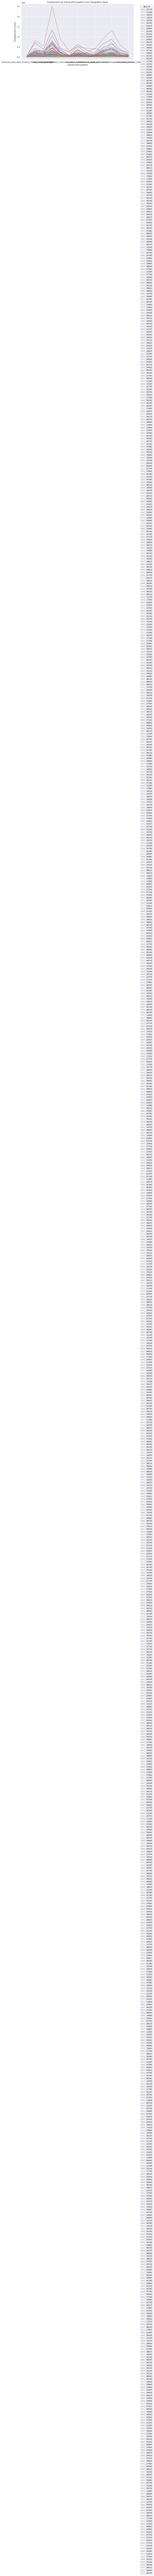

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Columns to use
columns = [
    'geo_id',
    'employed_agriculture_forestry_fishing_hunting_mining',
    'employed_arts_entertainment_recreation_accommodation_food',
    'employed_construction',
    'employed_education_health_social',
    'employed_finance_insurance_real_estate',
    'employed_information',
    'employed_manufacturing',
    'employed_other_services_not_public_admin',
    'employed_public_administration',
    'employed_retail_trade',
    'employed_science_management_admin_waste',
    'employed_transportation_warehousing_utilities',
    'employed_wholesale_trade'
]

# Create a DataFrame with the specified columns
data = df[columns]

# Set 'geo_id' as the index
data.set_index('geo_id', inplace=True)

# Transpose the DataFrame to have 'geo_id' on the y-axis
data = data.transpose()

# Create a line chart
ax = data.plot(kind='line', figsize=(12, 6))
ax.set_ylabel('Employment Count')
ax.set_xlabel('Industry/Occupation')
ax.set_title('Employment by Industry/Occupation Over Geographic Areas')

plt.legend(title='geo_id', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


Considering the large number of Geo_id's, I will need to identify them and then separte them into regions (i.e. North, South, East..) Then a clear graph can be created from them.

## Question 5: What are the key factors influencing housing cost burden, and how do these factors vary across different regions or demographic groups?



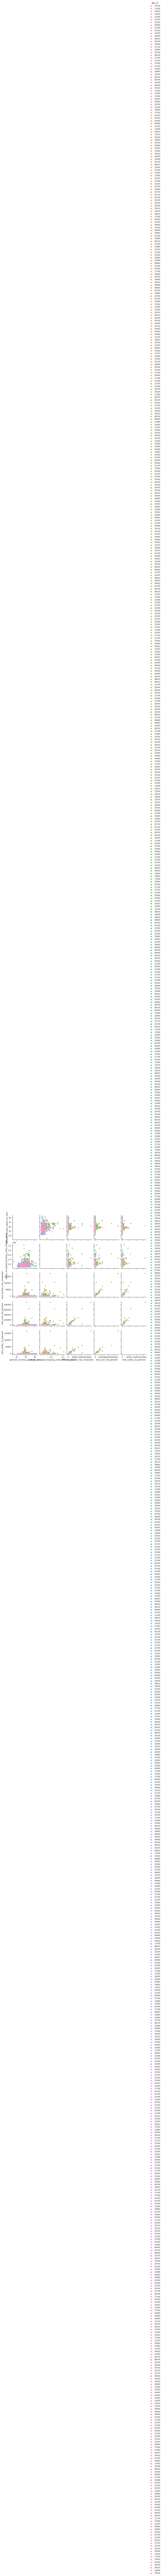

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to use
columns = [
    'geo_id',
    'percent_income_spent_on_rent',
    'owner_occupied_housing_units_median_value',
    'rent_burden_not_computed',
    'rent_over_50_percent',
    'rent_under_10_percent'
]

# Create a DataFrame with the specified columns
data = df[columns]

# Create a pair plot to visualize relationships
sns.set(style="ticks")
sns.pairplot(data, hue="geo_id")

plt.show()


Considering the large number of Geo_id's, I will need to identify them and then separte them into regions (i.e. North, South, East..) Then a clear graph can be created from them.

### **Hypothesis for Question 5:** Housing cost burden may vary across regions, with areas of higher home values potentially having higher income levels. Different demographic groups may also experience varying housing cost burdens.

# **Analysis Question 6:** How has the distribution of household types (e.g., single-parent households, multigenerational households) evolved over the 5-year period?

### **Hypothesis for Question 6:** We might observe shifts in the distribution of household types, with possible changes in the prevalence of single-parent households and multigenerational households over the 5-year period.

# **Analysis Question 7:** Is there a correlation between language proficiency and income or educational attainment among different communities?

### **Hypothesis for Question 7:** There may be correlations between language proficiency and income or educational attainment, with communities having higher English proficiency potentially demonstrating higher income and education levels.